### This notebook tunes the hyperparameters of a few well performing models

I used gridsearchCV to sift through the hyperparameters to try to build a model with higher performance. Each model listed is tuned using gridsearch and the accuracy is compared to the baseline.

#### Import libraries, data and pickles

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [115]:
with open('./pickles/custom_words.pkl', 'rb') as x:
    custom_words = pickle.load(x)

In [19]:
df= pd.read_csv('./data/cleaned_posts.csv')

In [116]:
X=df['selftext']
y=df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=20, stratify=y)

#### KNN

In [15]:
with open('./pickles/pipe_knn.pkl', 'rb') as x:
    pipe_knn = pickle.load(x)

In [21]:
params2 ={
    'kneighborsclassifier__n_neighbors':[7,8,9,10,11],
    'kneighborsclassifier__weights':['uniform','distance'],
    'kneighborsclassifier__leaf_size':[3,5,10,20,30,40],
    'countvectorizer__max_features': [None, 100, 1000],
    'countvectorizer__min_df': [1,2,3,4],
    'countvectorizer__ngram_range': [(1,1),(1, 2)]

}

In [22]:
gs2= GridSearchCV(
    pipe_knn,
    param_grid=params2,
    n_jobs=-1
)

In [23]:
gs2.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(stop_words=['running',
                                                                    'run',
                                                                    'marathon',
                                                                    'race',
                                                                    'runs',
                                                                    'ran',
                                                                    'shoes',
                                                                    'runner',
                                                                    'runners',
                                                                    'pain',
                                                                    'miles',
                                                                    'mile',
                 

In [24]:
gs2.best_estimator_

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_features=100,
                                 stop_words=['running', 'run', 'marathon',
                                             'race', 'runs', 'ran', 'shoes',
                                             'runner', 'runners', 'pain',
                                             'miles', 'mile', 'track', 'post',
                                             'treadmill', 'app', 'title',
                                             'wondering', 'foot', 'pace',
                                             'jogging', 'shoe', 'https',
                                             'thread', 'curious', 'week', '5k',
                                             'haven', 'body', 'atl', ...])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=3, n_neighbors=10))])

In [25]:
gs2.score(X_train, y_train), gs2.score(X_test, y_test)

(0.9003007170946102, 0.8868841082581541)

tuning the hyperparameters improved the knn performance by 2% from 86 to 88%

#### Logistic Regression Model

In [24]:
with open('./pickles/pipe_lr.pkl', 'rb') as x:
    pipe_lr = pickle.load(x)

In [ ]:
pipe_lr.get_params()

In [25]:
params3= {
    'countvectorizer__max_features': [None, 100, 1000],
    'countvectorizer__min_df': [1,2,3,4],
    'countvectorizer__ngram_range': [(1,1),(1, 2)],
    'logisticregression__C':[.5,1,10]
}

In [26]:
gs3= GridSearchCV(
    pipe_lr,
    param_grid=params3,
    n_jobs=-1
)

In [27]:
gs3.fit(X_train, y_train)

gs3.score(X_train,y_train), gs3.score(X_test,y_test)

(0.972704140643072, 0.9382373351839001)

In [28]:
gs3.best_estimator_

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(min_df=3, ngram_range=(1, 2),
                                 stop_words=['running', 'run', 'marathon',
                                             'race', 'runs', 'ran', 'shoes',
                                             'runner', 'runners', 'pain',
                                             'miles', 'mile', 'track', 'post',
                                             'treadmill', 'app', 'title',
                                             'wondering', 'foot', 'pace',
                                             'jogging', 'shoe', 'https',
                                             'thread', 'curious', 'week', '5k',
                                             'haven', 'body', 'atl', ...])),
                ('logisticregression',
                 LogisticRegression(C=0.5, max_iter=1000, random_state=20))])

#### AdaBoost

In [107]:
with open('./pickles/pipe_abc.pkl', 'rb') as x:
    pipe_abc = pickle.load(x)

In [37]:
params4= {
    'countvectorizer__max_features': [None, 100, 1000],
    'countvectorizer__min_df': [1,2,3,4],
    'countvectorizer__ngram_range': [(1,1),(1, 2)],
    'adaboostclassifier__n_estimators':[10,50,100]
}

In [38]:
gs4= GridSearchCV(
    pipe_abc,
    param_grid=params4,
    n_jobs=-1
)

gs4.fit(X_train, y_train)

gs4.score(X_train,y_train), gs4.score(X_test,y_test)

(0.953735831598427, 0.9368494101318529)

In [58]:
gs4.best_estimator_

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words=['running', 'run', 'marathon',
                                             'race', 'runs', 'ran', 'shoes',
                                             'runner', 'runners', 'pain',
                                             'miles', 'mile', 'track', 'post',
                                             'treadmill', 'app', 'title',
                                             'wondering', 'foot', 'pace',
                                             'jogging', 'shoe', 'https',
                                             'thread', 'curious', 'week', '5k',
                                             'haven', 'body', 'atl', ...])),
                ('adaboostclassifier', AdaBoostClassifier(n_estimators=100))])

#### Gradient Boost

In [109]:
with open('./pickles/pipe_gbc.pkl', 'rb') as x:
    pipe_gbc = pickle.load(x)

In [45]:
params5= {
    'countvectorizer__max_features': [None, 100, 1000],
    'countvectorizer__min_df': [1,2,3,4],
    'countvectorizer__ngram_range': [(1,1),(1, 2)],
    'gradientboostingclassifier__n_estimators':[50,100,200],
    'gradientboostingclassifier__max_depth':[3,5,7]
}

In [46]:
gs5= GridSearchCV(
    pipe_gbc,
    param_grid=params5,
    n_jobs=-1
)

gs5.fit(X_train, y_train)

gs5.score(X_train,y_train), gs5.score(X_test,y_test)

(0.9583622484385843, 0.9319916724496877)

#### VTC

In [9]:
with open('./pickles/vc1.pkl', 'rb') as x:
    vc1 = pickle.load(x)

In [10]:
cv= CountVectorizer(stop_words=custom_words, min_df=3, ngram_range=(1,2))
cv.fit(X_train)
X_train_cv= cv.transform(X_train)
X_test_cv= cv.transform(X_test)

In [11]:
vc1.get_params

<bound method _BaseHeterogeneousEnsemble.get_params of VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('etc', ExtraTreesClassifier()),
                             ('rfc', RandomForestClassifier())],
                 n_jobs=-1)>

In [12]:
params6={
    'lr__C':[.5,1,10],
    'lr__max_iter':[1000,10000],
    'etc__n_estimators':[50,100,200],
    'etc__max_depth':[None,3],
    'rfc__n_estimators':[50,100,200],
    'rfc__max_depth':[None,3]
    
}

In [13]:
gs6= GridSearchCV(
    vc1,
    param_grid=params6,
    n_jobs=-1
)

In [14]:
gs6.fit(X_train_cv,y_train)

GridSearchCV(estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression()),
                                                    ('etc',
                                                     ExtraTreesClassifier()),
                                                    ('rfc',
                                                     RandomForestClassifier())],
                                        n_jobs=-1),
             n_jobs=-1,
             param_grid={'etc__max_depth': [None, 3],
                         'etc__n_estimators': [50, 100, 200],
                         'lr__C': [0.5, 1, 10], 'lr__max_iter': [1000, 10000],
                         'rfc__max_depth': [None, 3],
                         'rfc__n_estimators': [50, 100, 200]})

In [15]:
gs6.score(X_train_cv,y_train), gs6.score(X_test_cv, y_test)

(0.9752486699051585, 0.9375433726578765)

In [16]:
gs6.best_estimator_

VotingClassifier(estimators=[('lr', LogisticRegression(C=1, max_iter=1000)),
                             ('etc', ExtraTreesClassifier(n_estimators=50)),
                             ('rfc', RandomForestClassifier(n_estimators=200))],
                 n_jobs=-1)

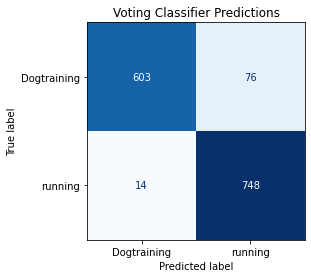

In [112]:
ConfusionMatrixDisplay.from_estimator(gs6, X_test_cv, y_test, cmap='Blues', colorbar=False)
plt.title('Voting Classifier Predictions');

#### Pickling and exporting

In [117]:
with open('./pickles/gs_lr.pkl', 'wb') as pickle_out:
    pickle.dump(gs3, pickle_out)